# Noise, Derivatives, and Initial Conditions
The derivatives of gaussian white noise are always large because of grid-scale fluctuations. 

It's actually much worse than this: Chebyshev directions ($y$ in this example) are dominated by errors at the boundaries, even if the noise is masked with $\sin(y)$.

In [15]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as de

In [46]:
xbasis = de.Fourier('x',32)
ybasis = de.Chebyshev('y',32,interval=[0,1])

dom = de.Domain([xbasis,ybasis],grid_dtype=np.float64)

DEBUG:domain:Global coeff shape: [16 32]
DEBUG:distributor:Mesh: []


In [47]:
phi = dom.new_field(name='phi')
phi_dx = dom.new_field(name='phi_x')
phi_dy = dom.new_field(name='phi_y')

In [48]:
y = dom.grid(1)
print(y)

[[  6.02271897e-04   5.41174502e-03   1.49843734e-02   2.92279674e-02
    4.80053534e-02   7.11356950e-02   9.83962343e-02   1.29524437e-01
    1.64220523e-01   2.02150348e-01   2.42948628e-01   2.86222453e-01
    3.31555073e-01   3.78509910e-01   4.26634763e-01   4.75466163e-01
    5.24533837e-01   5.73365237e-01   6.21490090e-01   6.68444927e-01
    7.13777547e-01   7.57051372e-01   7.97849652e-01   8.35779477e-01
    8.70475563e-01   9.01603766e-01   9.28864305e-01   9.51994647e-01
    9.70772033e-01   9.85015627e-01   9.94588255e-01   9.99397728e-01]]


Here, we create some noise data in $\phi$, then mask it with $\sin(y)$, then take the $x$ and $y$ derivatives. 

In [52]:
phi['g'] = np.random.standard_normal((32,32))*np.sin(np.pi*y)
phi.differentiate('x',out=phi_dx)
phi.differentiate('y',out=phi_dy)

<Field 140336849462776>

In [53]:
phi['g']

array([[  2.45629418e-03,  -2.82519221e-02,   3.50131796e-02, ...,
          2.23437650e-02,   1.50461788e-02,   1.02595530e-03],
       [  2.54369665e-03,   2.19363433e-02,   3.30326815e-02, ...,
         -1.54609069e-02,   1.18504239e-03,   6.56762168e-05],
       [  9.33192047e-05,   3.90219644e-03,  -6.98280753e-02, ...,
          6.15978912e-03,   7.40902413e-04,   9.43074598e-04],
       ..., 
       [  2.58124088e-04,   2.12809779e-02,  -6.85869682e-02, ...,
          1.48569623e-02,  -2.73317583e-02,   6.63668255e-04],
       [  1.37077680e-03,   3.84934894e-04,  -2.57297554e-02, ...,
         -3.87820886e-02,  -1.01238502e-02,   4.70967852e-03],
       [  2.07493038e-03,  -1.26224423e-02,  -3.96979530e-03, ...,
         -5.80094488e-02,  -3.24033714e-02,   7.19244872e-04]])

Here's the gaussian noise itself

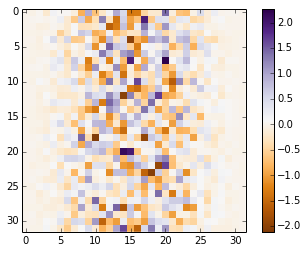

In [54]:
plt.imshow(phi['g'],cmap='PuOr',interpolation="None")
plt.colorbar()

Here's the $x$ derivative, a factor of $\sim 8$ higher than the noise for this particular draw.

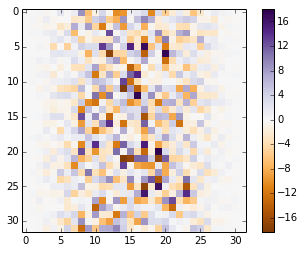

In [55]:
plt.imshow(phi_dx['g'],cmap='PuOr',interpolation="None")
plt.colorbar()

Here's the $y$ derivative, more than two orders of magnitude larger, all at the boundaries.

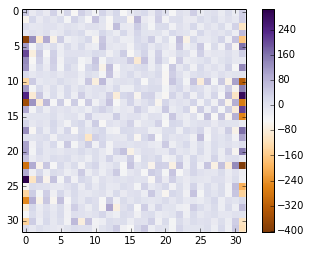

In [56]:
plt.imshow(phi_dy['g'],cmap='PuOr',interpolation="None")
plt.colorbar()